In [2]:
'''
Hello,
Welcome to the cleaning of the data in the vehicles and accidents datasets given in 
1. vehicles.csv
2. accidents.csv

Once cleaned, we can use that data in analysis.

'''

from pandas import read_csv
df2 = read_csv('./vehicles.csv')
print(df2.shape)
print(df2.columns)
#print(df2.describe)

(455652, 22)
Index(['accident_id', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'],
      dtype='object')


In [5]:
#Exploring the data set
df3 = read_csv('./accidents.csv')
print(df3.shape)
print(df3.describe)
print(df3.columns)

(137599, 30)
<bound method NDFrame.describe of         accident_id  location_easting_osgr  location_northing_osgr  longitude  \
0            359433                 519310                  188730  -0.279323   
1            446617                 551920                  174560   0.184928   
2            342312                 505930                  183850  -0.473837   
3            495118                 527770                  168930  -0.164442   
4            595500                 510740                  177230  -0.406580   
5            436622                 530840                  167100  -0.121004   
6            554669                 527610                  181430  -0.162234   
7            375031                 523830                  189460  -0.213859   
8            438328                 524640                  180620  -0.205302   
9            318474                 540670                  174700   0.023193   
10           579961                 528300                  18

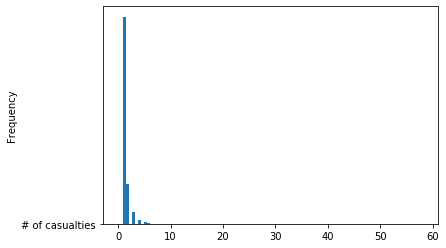

In [8]:
import matplotlib.pyplot as plt
df3['number_of_casualties'].plot(kind='hist' , bins=100)
plt.plot('# of casualties')

In [10]:
#Merging the 2 datasets 
import pandas as pd 
df23 = pd.merge(df3, df2, on="accident_id")
print(df23.shape)
print(df23.info())

(256703, 51)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 256703 entries, 0 to 256702
Data columns (total 51 columns):
accident_id                                256703 non-null int64
location_easting_osgr                      256703 non-null int64
location_northing_osgr                     256703 non-null int64
longitude                                  256703 non-null float64
latitude                                   256703 non-null float64
number_of_vehicles                         256703 non-null int64
number_of_casualties                       256703 non-null int64
date                                       256703 non-null object
time                                       256703 non-null object
1st_road_class                             256703 non-null object
1st_road_number                            256703 non-null int64
road_type                                  256703 non-null int64
speed_limit                                256703 non-null int64
junction_detail         

In [12]:
for name in df23.columns:
    print(df23[name].value_counts())

301654    32
522113    13
433930    12
482503    12
428202    12
569304    11
358428    11
421211    11
436390    11
534352    10
481528    10
465053    10
488927    10
513543    10
403266    10
576486    10
383289    10
316321    10
525232     9
404056     9
405851     9
525412     9
447378     9
580009     9
400004     9
421741     9
361574     9
420648     9
445674     9
363766     8
          ..
467673     1
461532     1
465630     1
579551     1
377733     1
402297     1
414583     1
430959     1
433006     1
435049     1
461660     1
482134     1
498510     1
492365     1
525117     1
545591     1
547638     1
553779     1
549681     1
551728     1
578343     1
318246     1
576292     1
596766     1
592668     1
344853     1
379652     1
385793     1
402169     1
526337     1
Name: accident_id, Length: 136575, dtype: int64
533650    107
531640     71
531170     68
531650     62
530130     62
530870     54
532320     54
530760     53
531180     51
532640     50
531570     49
53255

No physical crossing facilities within 50 metres                             210582
Pedestrian phase at traffic signal junction                                   18578
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     13105
Zebra                                                                          7079
Central refuge                                                                 5705
-1                                                                             1117
Footbridge or subway                                                            537
Name: pedestrian_crossing-physical_facilities, dtype: int64
Daylight                       188718
Darkness - lights lit           50569
Darkness - no lighting          11879
Darkness - lighting unknown      3994
Darkness - lights unlit          1526
-1                                 17
Name: light_conditions, dtype: int64
 1    212516
 2     26522
 5      6853
 4      4032
 7      2376
 6      2329
 3      1

Not at or within 20 metres of junction                         103462
Approaching junction or waiting/parked at junction approach     56270
Mid Junction - on roundabout or on main road                    54901
Cleared junction or waiting/parked at junction exit             13187
Entering main road                                              10713
Entering roundabout                                              6675
Leaving main road                                                6497
Leaving roundabout                                               3520
Entering from slip road                                           803
-1                                                                675
Name: Junction_Location, dtype: int64
None                         229815
Skidded                       16848
Overturned                     4801
Skidded and overturned         4277
-1                              847
Jackknifed                       71
Jackknifed and overturned        44
Name: Skid

In [15]:
print((df23['Sex_of_Driver']).unique())
print((df23['Sex_of_Driver']).value_counts())
print(df23.shape[0])

#We need to remove the -1 values and we use ratios for that (1 Not known: 4 Female: 8 Male)

['Male' 'Female' 'Not known' '-1']
Male         166587
Female        71257
Not known     18819
-1               40
Name: Sex_of_Driver, dtype: int64
256703


In [16]:
#Cleaning the sec of the driver 
counter = 0
size = df23.shape[0]
for i in range(size):
    if df23['Sex_of_Driver'][i] == '-1':
        if(counter % 13 < 8):
            df23['Sex_of_Driver'][i] = "Male"
        elif(counter % 13 > 8 & counter % 13 <11):
            df23['Sex_of_Driver'][i] = "Female"
        else:
            df23['Sex_of_Driver'][i] = "Not known"
        if(counter<13):
            counter = counter + 1 
        else:
            counter = 0 
print(df23['Sex_of_Driver'].value_counts())

C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':

Male         166613
Female        71268
Not known     18822
Name: Sex_of_Driver, dtype: int64


In [ ]:
#Using binarization in technical terms to make 3 more columns and remove one other column
df23['Sex_Male'] = 'default1'
df23['Sex_Female'] = 'default2'
df23['Sex_Not_Known'] = 'default3'

print(df23.shape)
for i in range(df23.shape[0]):
    if(i%1000==0):
        print(i)
        #to keep track of the count
    if df23['Sex_of_Driver'][i] == "Male":
        df23['Sex_Male'][i] = 1 
        df23['Sex_Female'][i] = 0
        df23['Sex_Not_Known'] = 0
    elif df23['Sex_of_Driver'][i] == "Female":
        df23['Sex_Male'][i] = 0 
        df23['Sex_Female'][i] = 1
        df23['Sex_Not_Known'] = 0
    else:
        df23['Sex_Male'][i] = 0
        df23['Sex_Female'][i] = 0
        df23['Sex_Not_Known'] = 1
df23 = df23.drop(columns="Sex_of_Driver")

In [17]:
print(df23['Was_Vehicle_Left_Hand_Drive?'].value_counts())

No     254236
Yes      1371
-1       1096
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64


In [18]:
#We need to remove the -1 values and we use ratios for that (1 No: 185 Yes)
counter = 0
size = df23.shape[0]
for i in range(size):
    if df23['Was_Vehicle_Left_Hand_Drive?'][i] == '-1':
        if(counter % 186 != 0):
            df23['Was_Vehicle_Left_Hand_Drive?'][i] = "No"
        else:
            df23['Was_Vehicle_Left_Hand_Drive?'][i] = "Yes"
        counter = counter + 1
        
print(df23['Was_Vehicle_Left_Hand_Drive?'].value_counts())

C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


No     255326
Yes      1377
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64


In [19]:
#Binarization for Was_Vehicle_Left_Hand_Drive
size = df23.shape[0]
print(size)
for i in range(size):
    if df23['Was_Vehicle_Left_Hand_Drive?'][i] == 'No':
        df23['Was_Vehicle_Left_Hand_Drive?'][i] = 0
    else:
        df23['Was_Vehicle_Left_Hand_Drive?'][i] = 1

print(df23['Was_Vehicle_Left_Hand_Drive?'].value_counts())

256703


C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kalaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [21]:
print(df23['target'][0])
print(df23.columns)

0
Index(['accident_id', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties',
       'date', 'time', '1st_road_class', '1st_road_number', 'road_type',
       'speed_limit', 'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'lsoa_of_accident_location', 'police_force',
       'local_authority_district', 'local_authority_highway', 'target',
       'Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st

In [24]:
print(df23['Journey_Purpose_of_Driver'].value_counts())

Not known                      170395
Journey as part of work         38640
Commuting to/from work          26326
Other                           17880
Taking pupil to/from school      2592
Pupil riding to/from school       855
-1                                 15
Name: Journey_Purpose_of_Driver, dtype: int64


In [ ]:
for i in range(df23.shape[0]):
    if df23['Journey_Purpose_of_Driver'][i] == -1:
        df23['Journey_Purpose_of_Driver'][i] = 'Not known'
        
print(df23['Journey_Purpose_of_Driver'].value_counts())

In [ ]:
#Using binarization in technical terms to make 3 more columns and remove one other column
df23['JP_Not_Known'] = 'default1'
df23['JP_PartOfWork'] = 'default2'
df23['JP_To_Work'] = 'default3'
df23['JP_Other'] = 'default4'
df23['JP_TakingPupilSchool'] = 'default5'
df23['JP_PupilSchool'] = 'default6'

print(df23.shape)
for i in range(df23.shape[0]):
    if(i%1000==0):
        print(i)
        #to keep track of the count
    if df23['Sex_of_Driver'][i] == "Male":
        df23['Sex_Male'][i] = 1 
        df23['Sex_Female'][i] = 0
        df23['Sex_Not_Known'] = 0
    elif df23['Sex_of_Driver'][i] == "Female":
        df23['Sex_Male'][i] = 0 
        df23['Sex_Female'][i] = 1
        df23['Sex_Not_Known'] = 0
    else:
        df23['Sex_Male'][i] = 0
        df23['Sex_Female'][i] = 0
        df23['Sex_Not_Known'] = 1
df23 = df23.drop(columns="Sex_of_Driver")

In [ ]:
from pandas import read_csv
df = read_csv('./test.csv')

#checking the details of the testing data set
print(df.shape)
print(df.columns)
print(df.head)